## Core Mission
  
  ### 다음 질문에 답하시오.
   
   - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
   
   - 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [87]:
charcters_stats = pd.read_csv("./charcters_stats.csv")

## 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.

  - `Total` column이 수치들의 합인 것을 알 수 있었다.
  - 가장 큰 값만 확인하면 되기 때문에 내림차순으로 정렬하여 head하나를 뽑아본다.

In [16]:
charcters_stats.sort_values(by=['Total'], ascending = False).head(1)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


### `Martian Manhunter` 가 수치합 581로 가장 높은 값을 가지고 있다.

## 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [20]:
charcters_stats['Alignment'].unique()

array(['good', 'bad', nan, 'neutral'], dtype=object)

### good, bad, nan, neutral이 존재한다 결측치가 있는 row는 제외하고 계산 하는 것이 좋아 보임

In [75]:
good_charcters_stats = charcters_stats[charcters_stats['Alignment'] == 'good']
good_charcters_stats

print(type(good_charcters_stats))

<class 'pandas.core.frame.DataFrame'>


In [76]:
bad_charcters_stats = charcters_stats[charcters_stats['Alignment'] == 'bad']
bad_charcters_stats

print(type(bad_charcters_stats))

<class 'pandas.core.frame.DataFrame'>


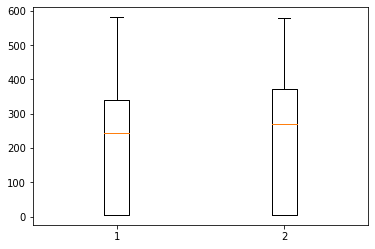

In [85]:
plt.boxplot((good_charcters_stats['Total'],bad_charcters_stats['Total']))
plt.show()

In [78]:
charcters_column = charcters_stats.columns.values

charcters_column = charcters_column[2:8]

charcters_column

array(['Intelligence', 'Strength', 'Speed', 'Durability', 'Power',
       'Combat'], dtype=object)

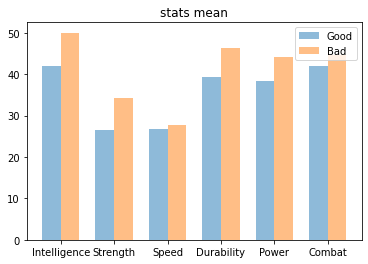

In [86]:
x = np.arange(len(x_label))
width = 0.35

good_charcters_stats_mean = []
bad_charcters_stats_mean = []

#print(type(bad_charcters_stats_mean))
#print(type(good_charcters_stats))
#print(type(bad_charcters_stats))
# ???? 왜 타입이 다르지
# ??? 왜 또 같아짐

for i in charcters_column:
    good_charcters_stats_mean.append(good_charcters_stats[i].mean())
    bad_charcters_stats_mean.append(bad_charcters_stats[i].mean())
    
fig, axes = plt.subplots()

axes.bar(x - width/2, good_charcters_stats_mean, width, align='center', alpha=0.5)
axes.bar(x + width/2, bad_charcters_stats_mean, width, align='center', alpha=0.5)

plt.xticks(x)
axes.set_xticklabels(charcters_column)

plt.title("stats mean")
plt.legend(['Good', 'Bad'])
plt.show()

## 나쁜 캐릭터가 모든 수치에서 우위를 보인다.

# Extra Mission
 
 ## 다음 질문에 답하시오.
   - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.
   
   - 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.
   
   - 이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.